In [1]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import random
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS

In [2]:
plt.rcParams["figure.dpi"] = 150

## データの生成

In [3]:
num_data = 30

In [4]:
np.random.seed(123)
x = np.random.rand(num_data) * 10

In [5]:
def true_model(x, A=np.pi, mu=4., sigma=0.5):
    model = np.exp(-0.5 * (x - mu)**2 / sigma**2)
    return model

In [6]:
y_true = true_model(x)

In [7]:
np.random.seed(123)
sigma_true = 0.1
noise = np.random.randn(num_data) * sigma_true

In [8]:
y_obs = y_true + noise
y_err = np.ones(num_data) * sigma_true

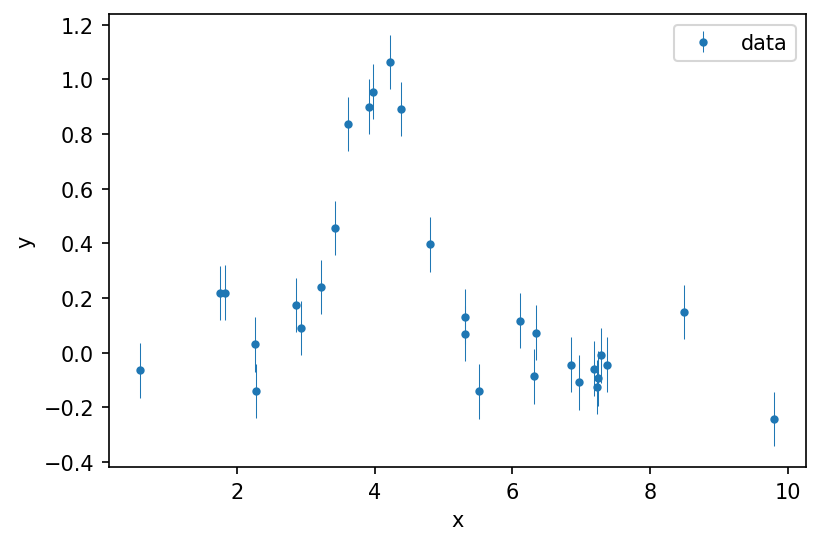

In [9]:
plt.xlabel("x")
plt.ylabel("y")
plt.errorbar(x, y_obs, fmt='o', yerr=y_err, lw=0.5, markersize=3, label='data')
plt.legend();

## 練習
$y$の真の値$y_\mathrm{true}$と$x$の関係が
$$ y_\mathrm{true} = A\,\exp\left[-{(x-\mu)^2 \over 2\sigma^2} \right]$$
であると仮定して、$y_\mathrm{obs}$から$A$, $\mu$, $\sigma$の値を推定し、上のコード内に示されている真の値と比べてみよう。